<a href="https://colab.research.google.com/github/nidhi-158/Unified-Mentor/blob/main/Project2_Bird_strike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Load the dataset

df=pd.read_csv("/content/Bird Strikes data.xlsx - Bird Strikes.csv")

In [44]:
print(df.head())              #prints the first 5 records of the data

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight        FlightDate  \
0                             859         Engine Shut Down     11/23/00 0:00   
1                             424                      NaN      7/25/01 0:00   
2                   

In [45]:
print(df.info())              #shows the column name ,type and not-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [46]:
print(df.describe())          #shows the statistical summary of the data

           Record ID  Wildlife: Number Struck Actual  Number of people injured
count   25558.000000                    25558.000000              25558.000000
mean   253916.085609                        2.691525                  0.001056
std     38510.453382                       12.793975                  0.050420
min      1195.000000                        1.000000                  0.000000
25%    225783.750000                        1.000000                  0.000000
50%    248749.000000                        1.000000                  0.000000
75%    269168.750000                        1.000000                  0.000000
max    321909.000000                      942.000000                  6.000000


In [47]:
print(df.isnull().sum())      #shows the number of null values in each column

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [48]:
df.fillna(df.mode().iloc[0],inplace=True)       #fill the missing vales with the value which appears the most

In [49]:
bird_strikes=df['Wildlife: Number Struck Actual']>0

In [50]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')

sorted_df=df.sort_values(by='Wildlife: Number Struck Actual', ascending=True, inplace=True)

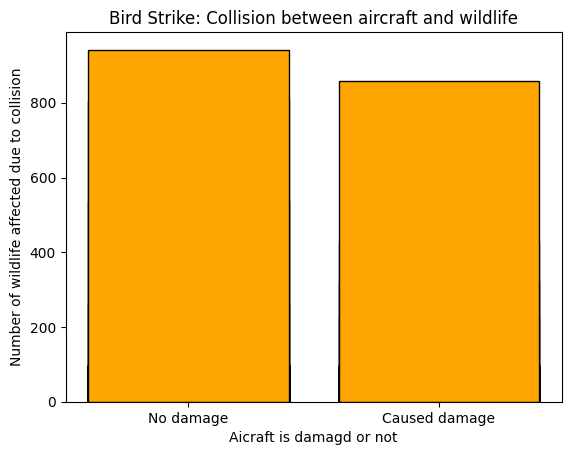



Effect: Indicated Damage
No damage        23081
Caused damage     2477
Name: count, dtype: int64

Number of bird strikes:
Wildlife: Number Struck Actual
True    25558
Name: count, dtype: int64


In [51]:
#1. visual depict number of air strike

#plt.figure(figsize=(10,6))
plt.bar(df['Effect: Indicated Damage'],df['Wildlife: Number Struck Actual'],color='orange',edgecolor='k')
plt.xlabel("Aicraft is damagd or not")
plt.ylabel("Number of wildlife affected due to collision")
plt.title("Bird Strike: Collision between aircraft and wildlife")
#plt.tight_layout()
#plt.grid()
plt.show()
print("\n")
print(df['Effect: Indicated Damage'].value_counts())
print("\nNumber of bird strikes:")
print(bird_strikes.value_counts())

Year
2000.0     548
2001.0     518
2002.0     689
2003.0     603
2004.0     653
2005.0     708
2006.0     811
2007.0     889
2008.0     925
2009.0    1200
2010.0    1224
2011.0    1138
Name: Wildlife: Number Struck Actual, dtype: int64


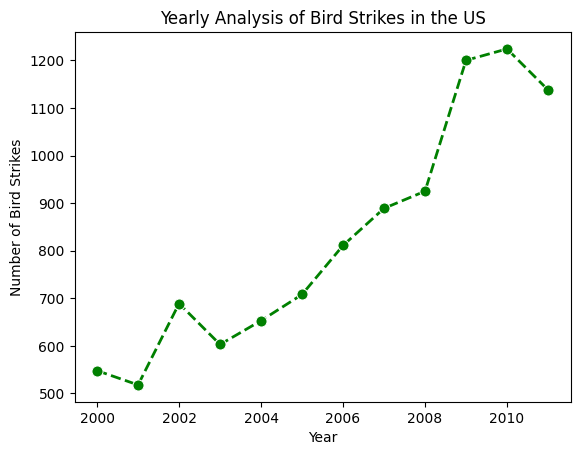

Year
2000.0     548
2001.0     518
2002.0     689
2003.0     603
2004.0     653
2005.0     708
2006.0     811
2007.0     889
2008.0     925
2009.0    1200
2010.0    1224
2011.0    1138
Name: Wildlife: Number Struck Actual, dtype: int64


In [55]:
#2. Yearly analysis of bird strike in US

df['FlightDate']=pd.to_datetime(df['FlightDate'], errors='coerce') # Use %Y for four-digit year
df['Year']=df['FlightDate'].dt.year

yearly_bird_strikes=df.groupby('Year')['Wildlife: Number Struck Actual'].count()
print(yearly_bird_strikes)
#plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_bird_strikes.index, y=yearly_bird_strikes.values,linewidth=2,color="green",marker="o",markersize=8,linestyle="--")
plt.title('Yearly Analysis of Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()
print(yearly_bird_strikes)

Aircraft: Airline/Operator
SOUTHWEST AIRLINES    9349
AMERICAN AIRLINES     6107
DELTA AIR LINES       3911
US AIRWAYS*           3377
UNITED AIRLINES       1930
JETBLUE AIRWAYS       1562
ALASKA AIRLINES       1538
HAWAIIAN AIR          1021
AIRTRAN AIRWAYS        933
FRONTIER AIRLINES      683
Name: Wildlife: Number Struck Actual, dtype: int64


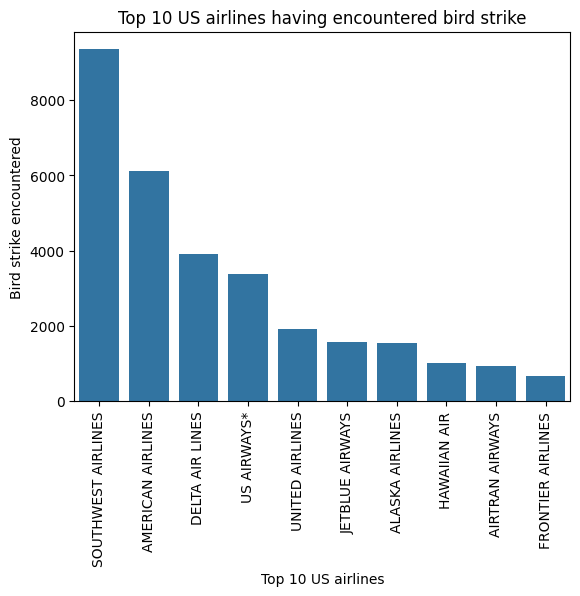

In [59]:
#3. Top 10 US airlines having encountered bird strike
us_airlines = ['US AIRWAYS*', 'AMERICAN AIRLINES', 'ALASKA AIRLINES',
               'UNITED AIRLINES', 'AIRTRAN AIRWAYS', 'DELTA AIR LINES',
               'SOUTHWEST AIRLINES', 'JETBLUE AIRWAYS', 'ALLEGIANT AIR',
               'SPIRIT AIRLINES', 'FRONTIER AIRLINES', 'HAWAIIAN AIR']

top_10_us_airlines = df[df['Aircraft: Airline/Operator'].isin(us_airlines)].groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().nlargest(10)

print(top_10_us_airlines)
sns.barplot(x=top_10_us_airlines.index,y=top_10_us_airlines.values)
plt.xticks(rotation=90)
plt.xlabel("Top 10 US airlines")
plt.ylabel("Bird strike encountered")
plt.title("Top 10 US airlines having encountered bird strike")
plt.show()

Airport: Name
DALLAS/FORT WORTH INTL ARPT               3074
SACRAMENTO INTL                           1856
LAGUARDIA NY                              1579
PHILADELPHIA INTL                         1396
SALT LAKE CITY INTL                       1376
SAN FRANCISCO INTL ARPT                   1210
JOHN F KENNEDY INTL                       1207
SEATTLE-TACOMA INTL                       1181
NORFOLK INTL                              1119
BALTIMORE WASH INTL                       1027
NASHVILLE INTL                            1003
LOGAN INTL                                 962
KANSAS CITY INTL                           921
CHARLOTTE/DOUGLAS INTL ARPT                917
CINCINNATI/NORTHERN KENTUCKY INTL ARPT     915
LOUISVILLE INTL ARPT                       914
ATLANTA INTL                               897
NEWARK LIBERTY INTL ARPT                   880
ORLANDO INTL                               855
DENVER INTL AIRPORT                        845
WASHINGTON DULLES INTL ARPT                826

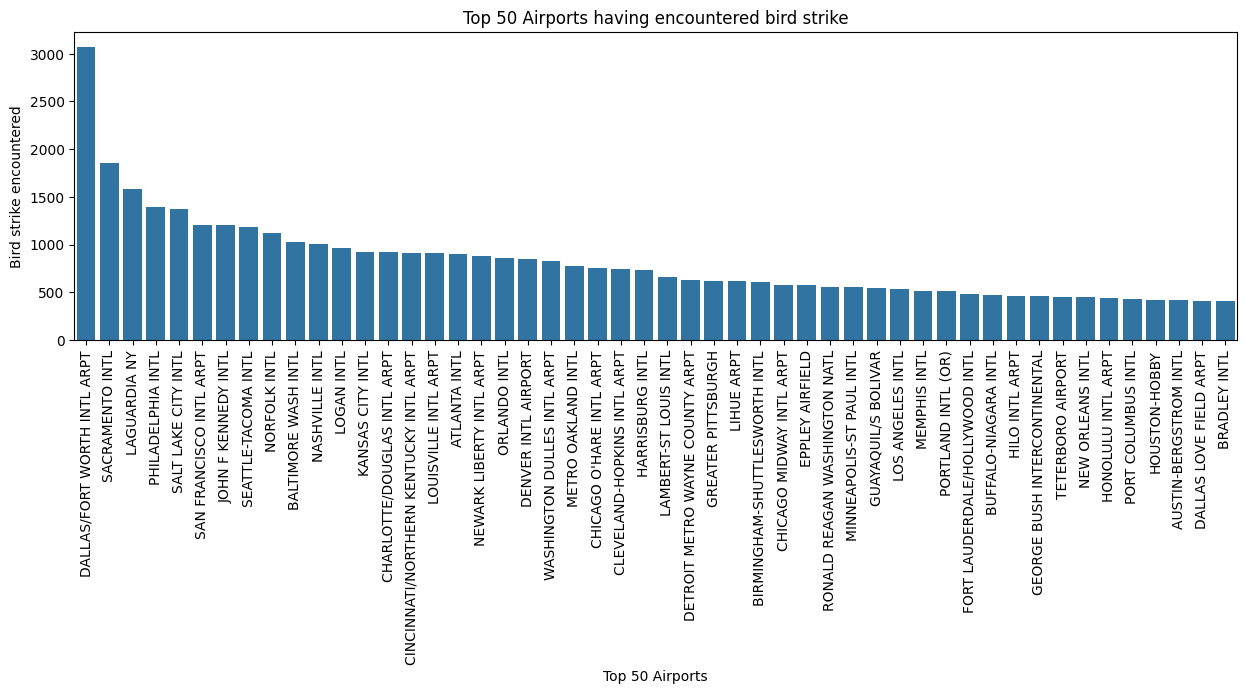

In [63]:
#4. Airports with most incidents of bird strikes – Top 50

top_50_airports = df.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum().nlargest(50)

print(top_50_airports)

plt.figure(figsize=(15,4))
sns.barplot(x=top_50_airports.index,y=top_50_airports.values)
plt.xticks(rotation=90)
plt.xlabel("Top 50 Airports")
plt.ylabel("Bird strike encountered")
plt.title("Top 50 Airports having encountered bird strike")
plt.show()

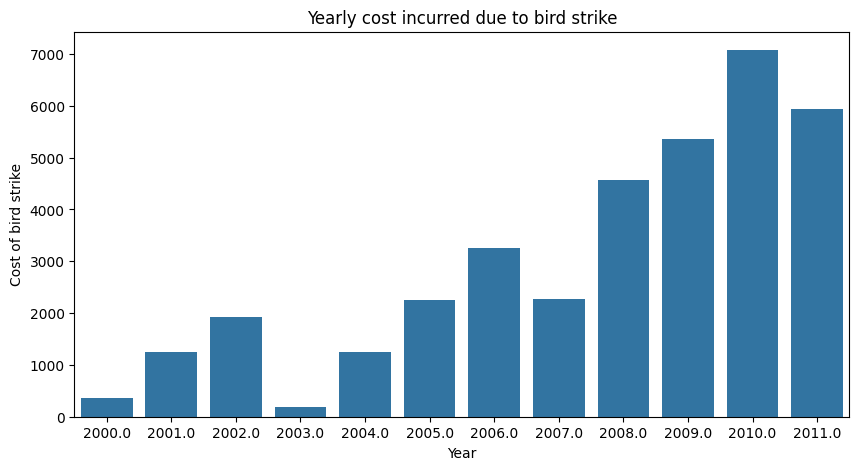



Year
2000.0     355.0
2001.0    1245.0
2002.0    1924.0
2003.0     179.0
2004.0    1250.0
2005.0    2246.0
2006.0    3261.0
2007.0    2271.0
2008.0    4574.0
2009.0    5366.0
2010.0    7076.0
2011.0    5940.0
Name: Cost: Total $, dtype: float64


In [68]:
#5. Yearly cost incurred due to bird strike

df['FlightDate']  = pd.to_datetime(df['FlightDate'], format='%m/%d/%y %H:%M', errors='coerce')
df['Year'] = df['FlightDate'].dt.year
yearly_cost_bird_strikes=df.groupby('Year')['Cost: Total $'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=yearly_cost_bird_strikes.index,y=yearly_cost_bird_strikes.values)
plt.xlabel('Year')
plt.ylabel('Cost of bird strike')
plt.title('Yearly cost incurred due to bird strike')
#plt.grid()
plt.show()
print("\n")
print(yearly_cost_bird_strikes)

Phase
Approach        10511
Climb            4429
Descent           776
Landing Roll     5047
Parked             10
Take-off run     4711
Taxi               74
Name: Wildlife: Number struck, dtype: int64


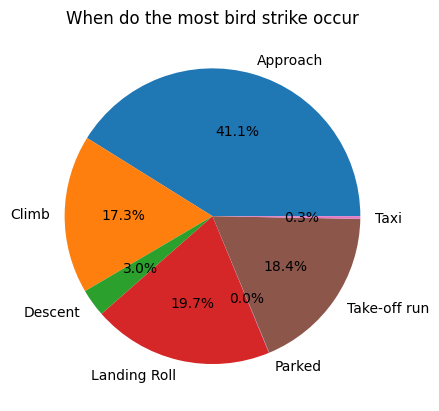

In [69]:
#6. when do the most bird strike occurs

df['Phase']=df['When: Phase of flight']

phase=df.groupby('Phase')['Wildlife: Number struck'].count()
#print("\n")
print(phase)

#plt.figure(figsize=(8,6))
plt.pie(phase,labels=phase.index,autopct='%1.1f%%')
plt.title("When do the most bird strike occur")
plt.show()

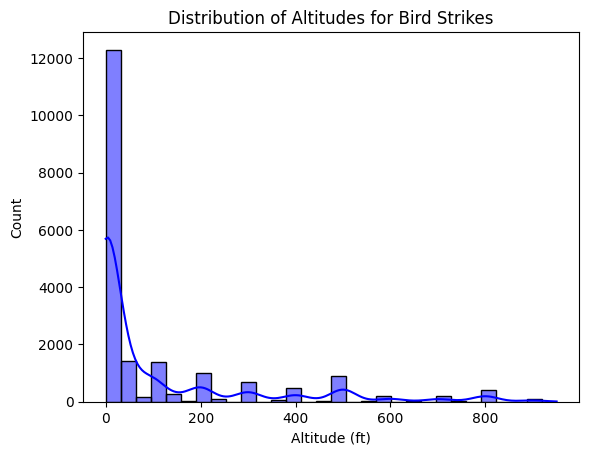


Altitude at which the most bird strike occures:
Feet above ground
0.0      9843
100.0    1357
50.0     1259
200.0    1001
10.0      893
Name: count, dtype: int64


In [ ]:
#7. Altitude at which the most bird strike occurs

df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')
altitude = df['Feet above ground'].dropna()

sns.histplot(altitude, bins=30, kde=True,color='blue')

plt.title('Distribution of Altitudes for Bird Strikes')
plt.xlabel('Altitude (ft)')
plt.ylabel('Count')
plt.show()

most_common_altitudes = altitude.value_counts().nlargest(5)
print("\nAltitude at which the most bird strike occures:")
print(most_common_altitudes)

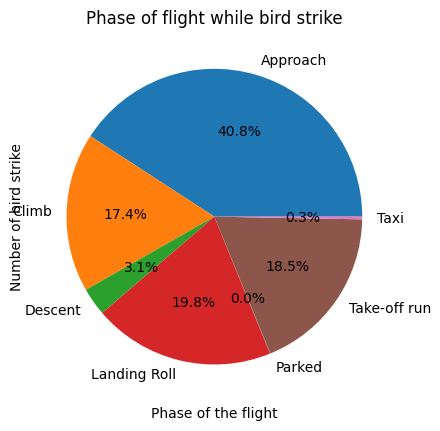



When: Phase of flight
Approach        10382
Climb            4429
Descent           776
Landing Roll     5047
Parked             10
Take-off run     4711
Taxi               74
Name: Wildlife: Number Struck Actual, dtype: int64


In [14]:
#8. Phase of flight while bird strike

phase=df['When: Phase of flight']

phase_bird_strike=df.groupby(phase)['Wildlife: Number Struck Actual'].count()
plt.pie(phase_bird_strike,labels=phase_bird_strike.index,autopct="%1.1f%%")
plt.title('Phase of flight while bird strike')
plt.xlabel('Phase of the flight')
plt.ylabel('Number of bird strike')
#plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
print("\n")
print(phase_bird_strike)

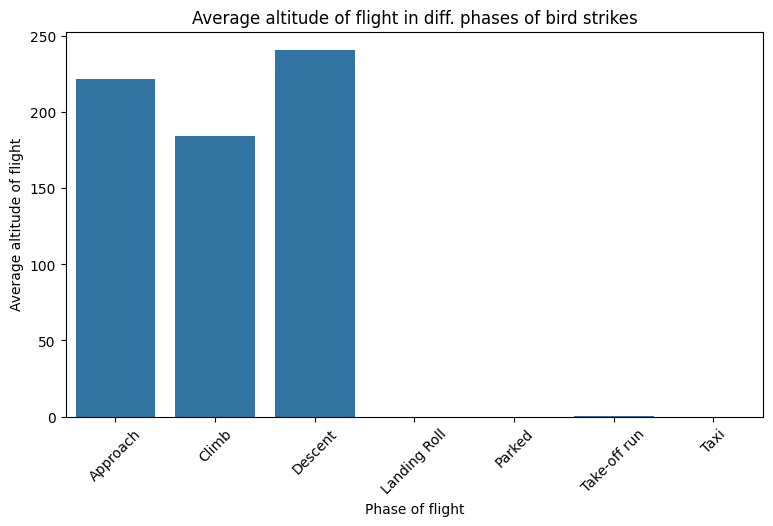



When: Phase of flight
Approach        221.953589
Climb           184.578211
Descent         240.750000
Landing Roll      0.000000
Parked            0.000000
Take-off run      0.101040
Taxi              0.000000
Name: Feet above ground, dtype: float64


In [71]:
#9. Average altitude of flight in diff. phases of bird strikes

df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

avg_altitude_flight=df.groupby('When: Phase of flight')['Feet above ground'].mean()
plt.figure(figsize=(9,5))
sns.barplot(x=avg_altitude_flight.index,y=avg_altitude_flight.values)
plt.xlabel("Phase of flight")
plt.ylabel("Average altitude of flight")
plt.title("Average altitude of flight in diff. phases of bird strikes")
plt.xticks(rotation=45)
plt.show()
print("\n")
print(avg_altitude_flight)


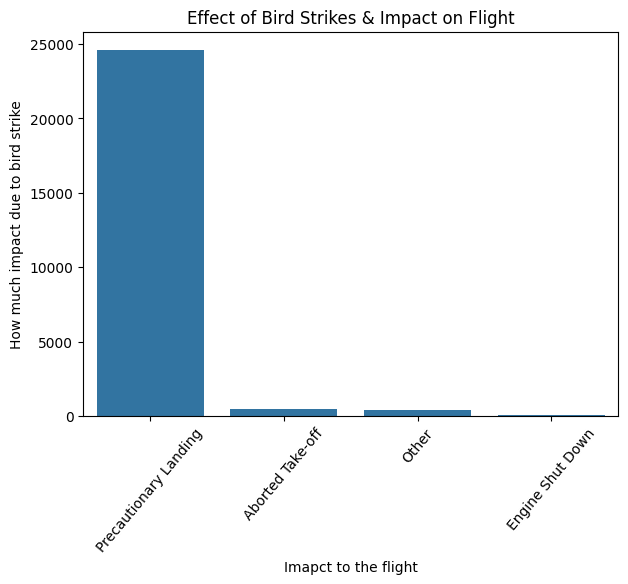


Effect of bird strike and impact on flight
Effect: Impact to flight
Precautionary Landing    24601
Aborted Take-off           479
Other                      390
Engine Shut Down            88
Name: count, dtype: int64


In [72]:
#10. Effect of bird strike and impact on flight

impact=df['Effect: Impact to flight'].value_counts()
sns.barplot(x=impact.index,y=impact.values)
plt.xlabel('Imapct to the flight')
plt.ylabel('How much impact due to bird strike')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()
print("\nEffect of bird strike and impact on flight")
print(impact)



Effect: Impact to flight
Aborted Take-off         51
Engine Shut Down         51
Other                    51
Precautionary Landing    51
dtype: int64


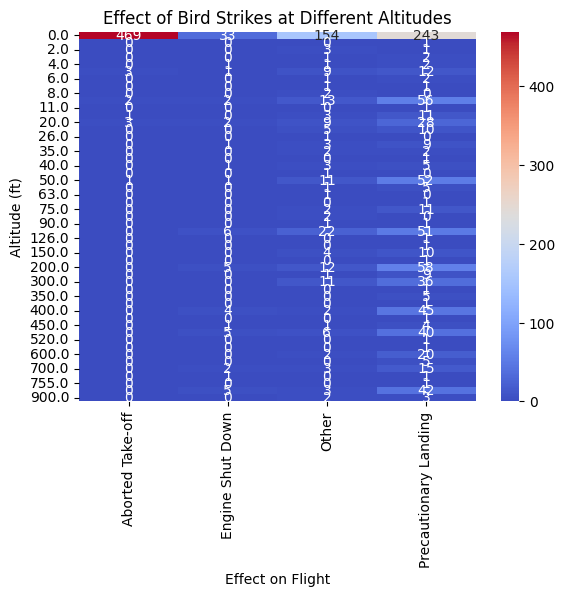

In [ ]:
#11. Effect of bird strike at different altitudes

altitude=df['Feet above ground']
effect=df['Effect: Impact to flight']

effect_at_altitude=df.groupby('Feet above ground')['Effect: Impact to flight'].value_counts().unstack().fillna(0)
print("\n")
print(effect_at_altitude.count())
#plt.figure(figsize=(12, 6))

sns.heatmap(effect_at_altitude, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Effect on Flight')
plt.ylabel('Altitude (ft)')
plt.show()

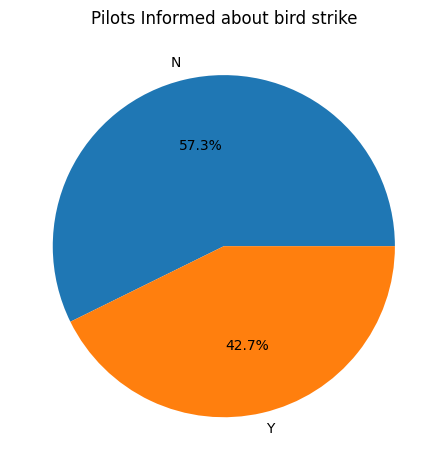

In [15]:
#12(i). Were pilots informed about the bird strike.

pilots_informed=df['Pilot warned of birds or wildlife?'].value_counts()
plt.pie(pilots_informed,labels=pilots_informed.index,autopct='%1.1f%%')
plt.title("Pilots Informed about bird strike")
plt.tight_layout()
plt.show()

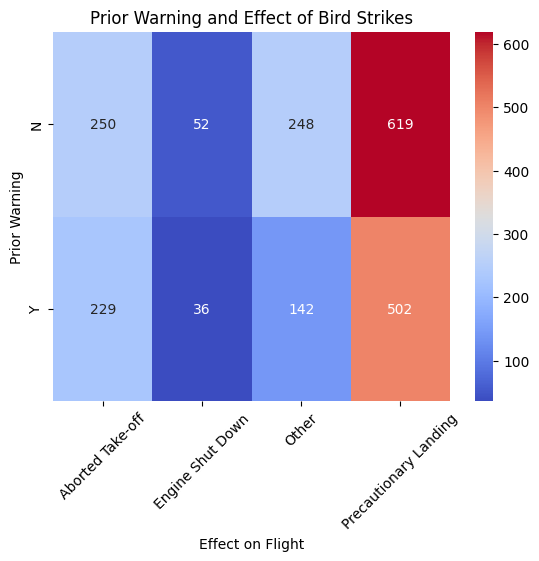

Aborted Take-off  Engine Shut Down  Other  Precautionary Landing
229               36                142    502                      1
250               52                248    619                      1
Name: count, dtype: int64


In [ ]:
#12(ii). Prior warning and effect of bird strike

prior_warning= df.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().unstack().fillna(0)
#plt.figure(figsize=(12, 6))
sns.heatmap(prior_warning, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Prior Warning and Effect of Bird Strikes')
plt.xlabel('Effect on Flight')
plt.ylabel('Prior Warning')
plt.xticks(rotation=45)
plt.show()
print(prior_warning.value_counts())